### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


### Reading dataset and initial exploration

In [3]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

- Note no missing values. Wrong types for the 'Date of Admission' and 'Discharge Date' columns. Names have random upper cases.

In [12]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Name'] = df['Name'].str.lower()
bins = [12, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


In [13]:
df.describe()

,Age,Billing Amount,Room Number,Length of Stay
count,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829,15.509009
std,19.602454,14211.454431,115.243069,8.659600
min,13.000000,-2008.492140,101.000000,1.000000
25%,35.000000,13241.224652,202.000000,8.000000
50%,52.000000,25538.069376,302.000000,15.000000
75%,68.000000,37820.508436,401.000000,23.000000
max,89.000000,52764.276736,500.000000,30.000000


### EDA

In [14]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

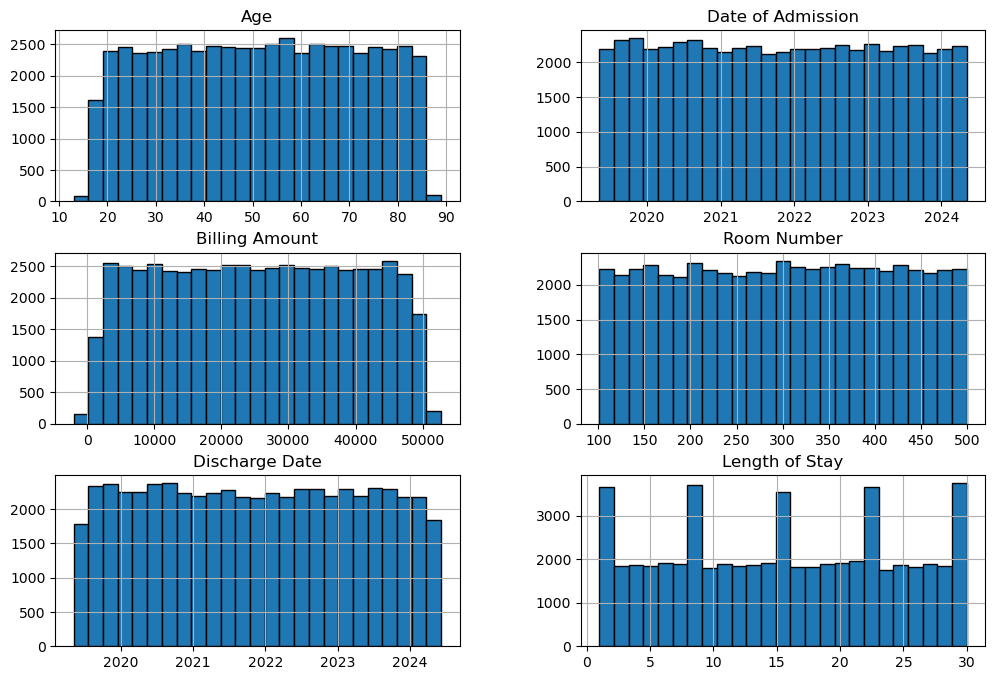

In [15]:
df.hist(bins=25, figsize=(12,8), edgecolor= 'black')
plt.show()


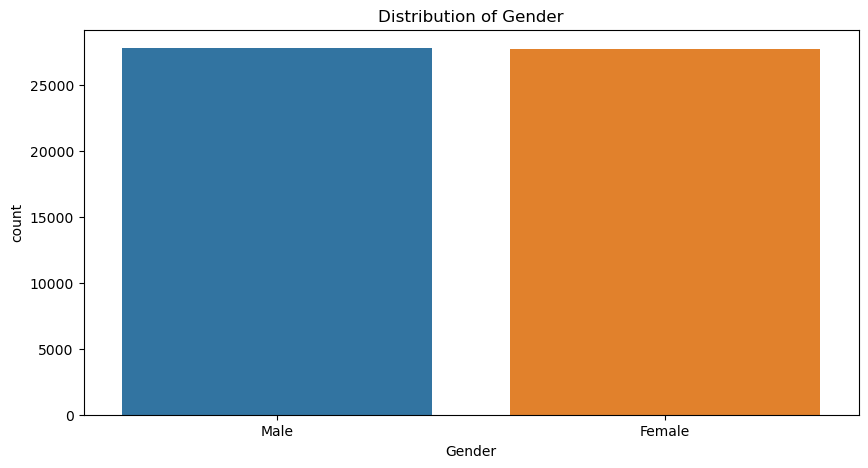

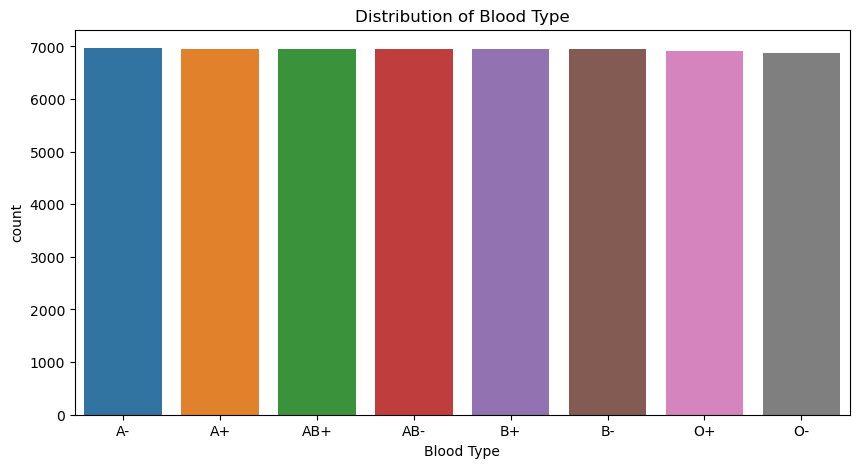

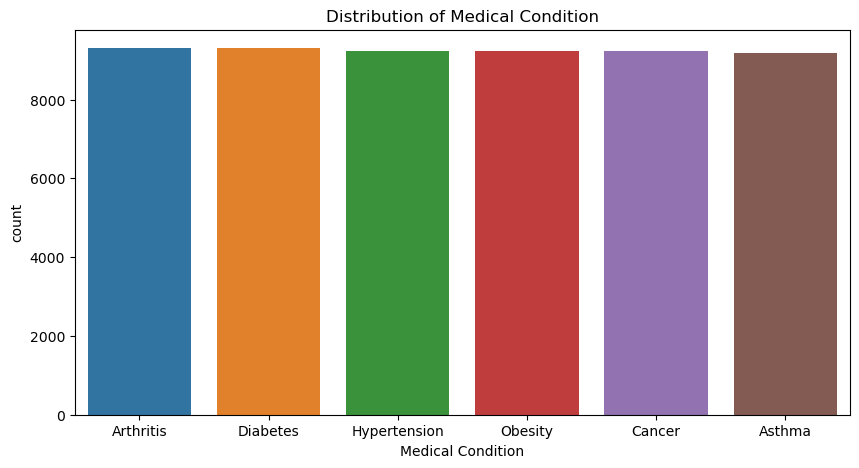

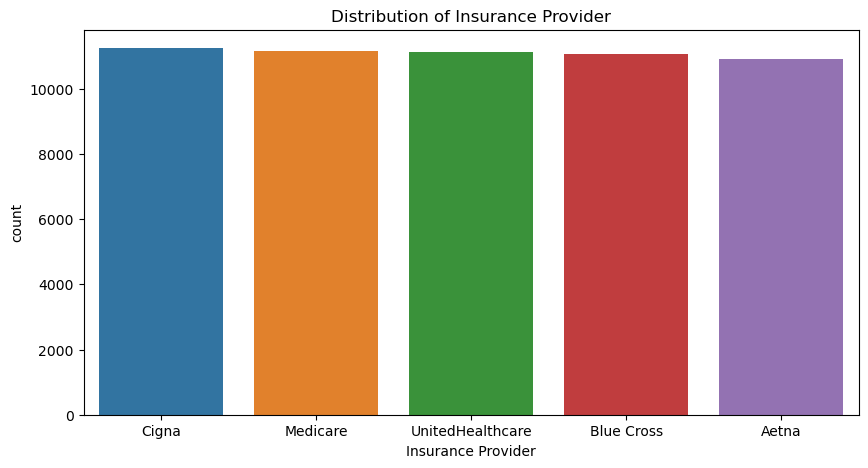

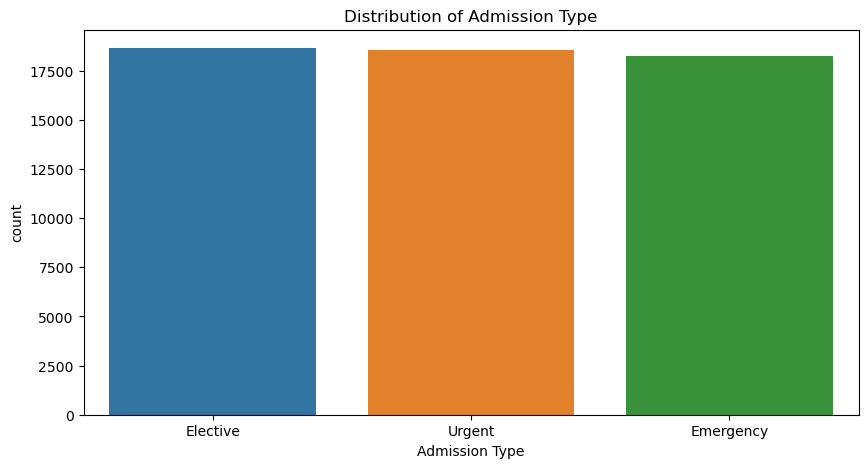

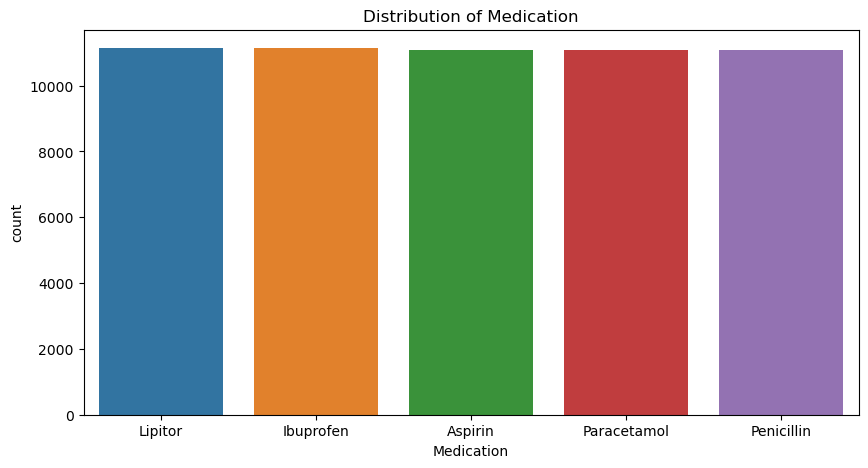

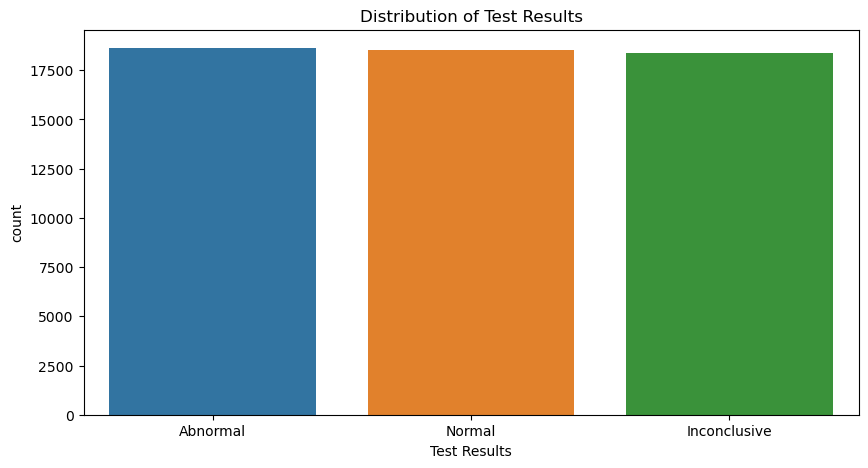

In [16]:
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()


In [23]:
df.corr()

,Age,Billing Amount,Room Number,Length of Stay
Age,1.000000,-0.003832,-0.000720,0.008220
Billing Amount,-0.003832,1.000000,-0.002943,-0.005602
Room Number,-0.000720,-0.002943,1.000000,-0.005526
Length of Stay,0.008220,-0.005602,-0.005526,1.000000


In [11]:
df.to_csv("transformed_df.csv", header= True)